## Определение проблемы

> Зная из обучающего набора выборок, в котором перечислены пассажиры, которые выжили или не выжили в катастрофе «Титаник», может ли наша модель определить на основе заданного тестового набора данных, не содержащего информации о выживании, выжили ли эти пассажиры из тестового набора данных или нет.


## Цели

Рабочий процесс решений для анализа данных решает семь основных целей.<br>

<b>Классификация</b> Мы можем захотеть классифицировать или классифицировать наши образцы. Мы также можем захотеть понять последствия или взаимосвязь различных классов с нашей целью решения.

<b>Корреляция</b> К проблеме можно подойти на основе доступных функций в наборе обучающих данных. Какие функции в наборе данных существенно способствуют достижению цели нашего решения? С точки зрения статистики, существует ли  <b>корреляция</b> между функцией и целью решения? 

<b>Конвертация</b> Для этапа моделирования необходимо подготовить данные. В зависимости от выбора алгоритма модели может потребоваться преобразование всех функций в числовые эквивалентные значения.

<b>Пропущенные значения</b> Подготовка данных может также потребовать от нас оценки любых недостающих значений в пределах функции. Алгоритмы модели могут работать лучше всего, когда нет пропущенных значений.

<b>Выбросы</b> Мы также можем проанализировать данный обучающий набор данных на наличие ошибок или, возможно, неточных значений внутри функций и попытаться исправить эти значения или исключить образцы, содержащие ошибки. Один из способов сделать это - обнаружить какие-либо выбросы среди наших выборок или функций.

<b>Создание</b> Можем ли мы создавать новые функции на основе существующей функции или набора функций, чтобы новая функция соответствовала целям корреляции, преобразования и полноты.

<b>Диаграммы</b> Как выбрать правильные графики и диаграммы для визуализации в зависимости от характера данных и целей решения.

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

Анализируем features

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Категориальные столбцы:
- Categorical: Survived, Sex, and Embarked. 
- Ordinal: Pclass.

Числовые:
- Continous: Age, Fare. Discrete: SibSp, Parch.

In [5]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Какие функции относятся к смешанным типам данных?</b>(числа и строки в одном)

- Билет, Кабина

<b>Какие функции могут содержать ошибки или опечатки?</b>
 - Имя может содержать ошибки или опечатки, поскольку существует несколько способов описания имени, включая заголовки, круглые скобки и кавычки, используемые для альтернативных или коротких имен.

In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Какие функции содержат пустые, нулевые или пустые значения?**

- Cabin, Age, Embarked содержат ряд нулевых значений в указанном порядке для обучающего набора данных.
- Кабина, Возраст являются неполными в случае тестового набора данных.

**Какие типы данных используются для различных функций?**

- Семь столбцов int или float. Шесть в случае тестового набора данных.
- Пять столбцов - строки(обьекты).

In [7]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

### Узнаем каково распределение числовых значений признаков.

Это помогает нам определить насколько репрезентативность обучающего датасета.

- Всего выборка составляет 891 или 40% от фактического количества пассажиров на борту Титаника (2224).
- Выживание - это категориальный признак со значениями 0 или 1.
- Около 38% образцов выжили, что соответствует фактической выживаемости 32%.
- Большинство пассажиров (> 75%) не путешествовали с родителями или детьми.
- Почти 30% пассажиров имели на борту братьев, сестер и / или супругов.
- Стоимость проезда значительно различалась: немногие пассажиры (<1%) платили до 512 долларов.
- Небольшое количество пожилых пассажиров (<1%) в возрасте от 65 до 80 лет.

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Review survived rate knowing our problem description mentions 38% survival rate.
percentiles=[50,60, 61,62,75]
p = np.percentile(train_df.Survived, percentiles)
p

array([0., 0., 0., 1., 1.])

In [10]:
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`
percentiles= range(1,99)
#p = np.percentile(train_df.Age, percentiles)
#p

In [11]:
# Review Parch distribution using `percentiles=[.75, .8]`
percentiles=[75,80,90]
p = np.percentile(train_df.Parch, percentiles)
p

array([0., 1., 2.])

In [12]:
# SibSp distribution `[.68, .69]`
percentiles=[60,65,68,69,70,75]
p = np.percentile(train_df.SibSp, percentiles)
p

array([0., 0., 0., 1., 1., 1.])

### Каково распределение категориальных признаков?

 - Имена уникальны в наборе данных (count = unique = 891)
 - Переменная пола как два возможных значения с 65% мужчин (577/891)
 - Значения кабинета имеют несколько двойных значений в выборках. В качестве альтернативы несколько пассажиров жили в одной каюте.
 - Embarked принимает три возможных значения. Порт S используется большинством пассажиров 
 - Функция билета имеет высокий процент (22%) повторяющихся значений 

In [13]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Webber, Mr. James",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### Предположения на основе проведенного анализа данных
Мы можем дополнительно проверить эти предположения, прежде чем предпринимать соответствующие действия.


**Завершение.**
1. Дополнить функцию «Возраст», поскольку она определенно связана с выживаемостью.
2. Дополнить функцию Embarked, поскольку она также может коррелировать с выживанием или другой важной функцией.

**Исправление.**

1. Характеристика билета может быть исключена из нашего анализа, поскольку она содержит большое количество дубликатов (22%) и может не быть корреляции между билетом и выживаемостью.
2. Функция кабины может быть удалена, так как она очень неполная или содержит много нулевых значений как в обучающем, так и в тестовом наборе данных.
3. PassengerId может быть исключен из обучающего набора данных, поскольку он не способствует выживаемости.
4. Функция имени относительно нестандартна, не может напрямую способствовать выживанию, поэтому может быть пропущена.

**Создание.**

1. Создать новую функцию под названием Family на основе Parch и SibSp, чтобы получить общее количество членов семьи на борту.
2. Разработать функцию Name для извлечения Title.
3. Создать новую функцию для возрастных групп. Это превращает непрерывный числовой признак в порядковый категориальный признак.
4. Мы также можем захотеть создать функцию «Диапазон тарифов», если это поможет нашему анализу.

**Классификация.**

Мы также можем добавить к нашим предположениям, основываясь на описании проблемы, упомянутом ранее.

1. Женщины (пол = женский) имели больше шансов выжить.
2. Дети (возраст <?) Имели больше шансов выжить.
3. У пассажиров высшего класса (Pclass = 1) больше шансов выжить.

### Анализ features

Чтобы подтвердить некоторые из наших наблюдений и предположений, мы можем быстро проанализировать корреляцию между функциями, сравнивая функции друг с другом. Мы можем сделать это только на этом этапе для функций, которые не имеют пустых значений. Также имеет смысл делать это только для функций категориального (Sex), порядкового (Pclass) или дискретного (SibSp, Parch) типа.

<b>Pclass</b> Мы наблюдаем значительную корреляцию (> 0,5) между Pclass = 1 и Survived. Мы решили включить эту функцию в нашу модель.<br>

<b>Пол</b> Мы подтверждаем наблюдение во время определения проблемы, что Пол = женщина имеет очень высокий коэффициент выживаемости - 74% (классифицируя №1).<br>

<b>SibSp и Parch</b> Эти функции не имеют корреляции для определенных значений. Возможно, лучше всего вывести функцию или набор функций из этих отдельных функций (создание №1).

In [14]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Анализ через визуализацию 

Гистограмма полезна для анализа непрерывных числовых переменных, таких как возраст, где полосы или диапазоны помогут выявить полезные закономерности.


Наблюдения.
 - Младенцы (возраст <= 4) имели высокую выживаемость.
 - Старшие пассажиры (возраст = 80) выжили.
 - Большое количество 15-25-летних не выжило.
 - Большинство пассажиров находятся в возрастном диапазоне от 15 до 35 лет.


Мы должны учитывать возраст (наше предположение, классифицирующее №2) при обучении нашей модели.
Заполните функцию Возраст для нулевых значений (заполнив №1).
Мы должны объединить возрастные группы (создавая № 3).

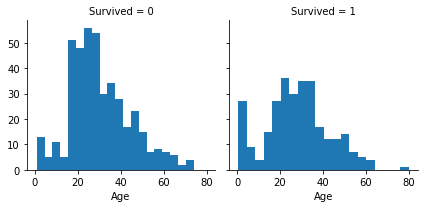

In [21]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Зависимость числовых и порядковых признаков
**Наблюдения**

- Pclass = 3 имел большинство пассажиров, однако большинство не выжило. 
- Младенческие пассажиры в Pclass = 2 и Pclass = 3 в основном выжили. Д
- Большинство пассажиров класса Pclass = 1 выжили.
- Класс Pclass зависит от возраста пассажиров.

**Решения**
- Рассмотрите Pclass для обучения модели.

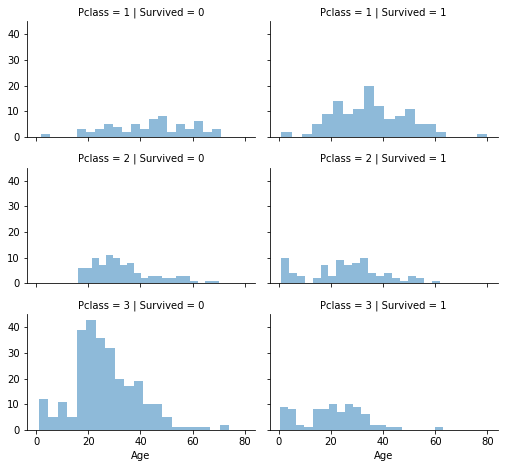

In [22]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Наблюдения**

 - Выживаемость женщин-пассажиров была намного выше, чем у мужчин. Подтверждает классификацию (№1).
 - Исключение составляет Embarked = C, где выживаемость мужчин была выше. Это может быть корреляция между Pclass и Embarked и, в свою очередь, Pclass и Survived, но не обязательно прямая корреляция между Embarked и Survived.
 - Мужчины имели лучшую выживаемость при Pclass = 3 по сравнению с Pclass = 2 для портов C и Q. Завершение (# 2).
 - Порты посадки имеют разную выживаемость для пассажиров Pclass = 3 и мужчин. Корреляция (# 1).

**Решения**

Добавить пол в обучение модели.
Завершите и добавьте функцию Embarked для обучения модели.

/home/nastya/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/nastya/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


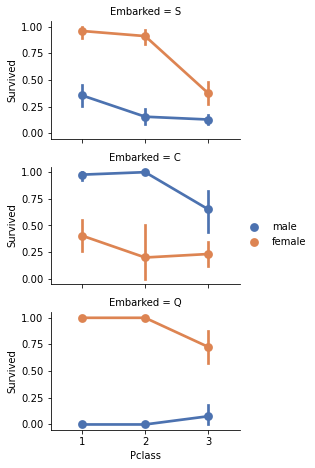

In [23]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Наблюдения**

 - Пассажирам с более высокой оплатой проезда было лучше выжить. 
 - Порт посадки коррелирует с выживаемостью.
 
**Решения**\
Рассмотрите возможность группирования тарифов.

/home/nastya/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/nastya/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


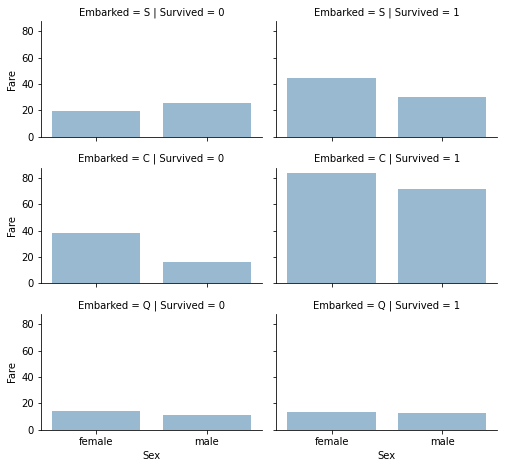

In [24]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### Исправление данных

**Удаление столбцов**
Основываясь на наших предположениях и решениях, мы хотим отказаться от Каюты и Билета.<br>
Обратите внимание, что там, где это возможно, мы выполняем операции как с обучающими, так и с тестовыми наборами данных вместе, чтобы оставаться последовательными.

In [25]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### Создание новых столбцов(характеристик)

Мы хотим проанализировать, можно ли спроектировать функцию Name для извлечения заголовков и проверки корреляции между заголовками и выживаемостью, прежде чем отказаться от функций Name и PassengerId.

В следующем коде мы извлекаем функцию Title с помощью регулярных выражений. Шаблон RegEx (\ w + \.) Соответствует первому слову, которое заканчивается точкой в функции имени. Флаг expand = False возвращает DataFrame.

**Наблюдения**<br>
Когда мы строим график Title, Age и Survived, мы отмечаем следующие наблюдения.

 - Большинство названий точно соответствуют возрастным группам. Например: звание магистра имеет средний возраст 5 лет.
 - Выживаемость среди возрастных групп титула варьируется незначительно.
 - Некоторые титулы в основном сохранились (Mme, Lady, Sir) или нет (Don, Rev, Jonkheer).
 
**Решение**<br>
Мы решили сохранить новую функцию Title для обучения моделей.

In [26]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as `Rare`.

In [27]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal.

In [28]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [29]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Преобразование категориального признака
Теперь мы можем преобразовывать объекты, содержащие строки, в числовые значения. <br>
Давайте начнем с преобразования признака пола в новую функцию под названием Пол, где женский = 1, а мужской = 0.

In [30]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Завершение числового непрерывного признака
Теперь мы должны начать оценивать и дополнять функции с отсутствующими или нулевыми значениями. Сначала мы сделаем это для функции "Возраст".

**Более точный способ угадать недостающие значения** - использовать другие коррелированные функции. В нашем случае мы отмечаем корреляцию между возрастом, полом и классом. Угадайте значения возраста, используя медианные значения возраста по наборам комбинаций функций Pclass и Gender. 
<i>Итак, средний возраст для Pclass = 1 и Gender = 0, Pclass = 1 и Gender = 1 и т. Д.</i>

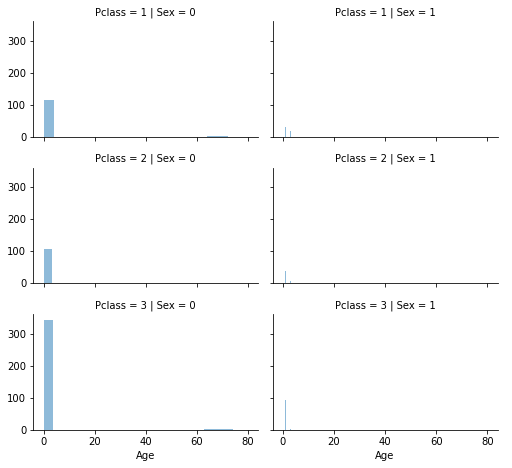

In [38]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [39]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [34]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [35]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [36]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can not remove the AgeBand feature.

In [37]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Создание новой характеристики FamilySize
Мы можем создать новую функцию для FamilySize, которая объединяет Parch и SibSp. Это позволит нам удалить Parch и SibSp из наших наборов данных.

In [40]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [41]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [42]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [43]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Завершение категориальной функции
Функция «Посадка» принимает значения S, Q, C в зависимости от порта посадки. В нашем наборе обучающих данных два пропущенных значения. Мы просто заполняем их наиболее частыми случаями.

In [44]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [45]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [46]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Быстрое заполнение и преобразование числового объекта

In [48]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


We can not create FareBand.

In [49]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [50]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


And the test dataset.

In [51]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [52]:
train_df.to_csv(r'train_df.csv', index = False)

In [53]:
test_df.to_csv(r'test_df.csv', index=False)